In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [3]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

In [29]:
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

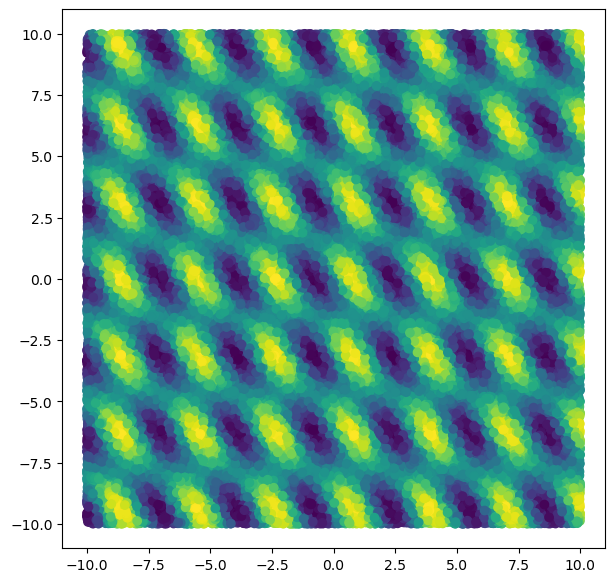

In [30]:
graph_continuous(sincos, 10, 10, x_random = True, n_samples= 100000, y_random = True)

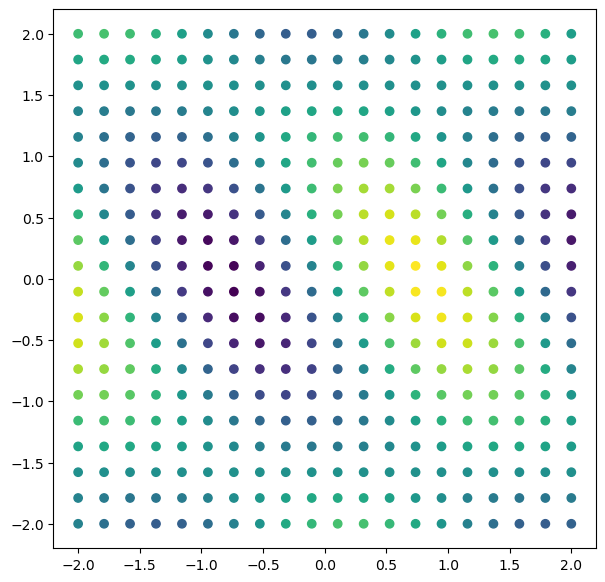

In [31]:
view_window_continuous(sincos, 20, 4)

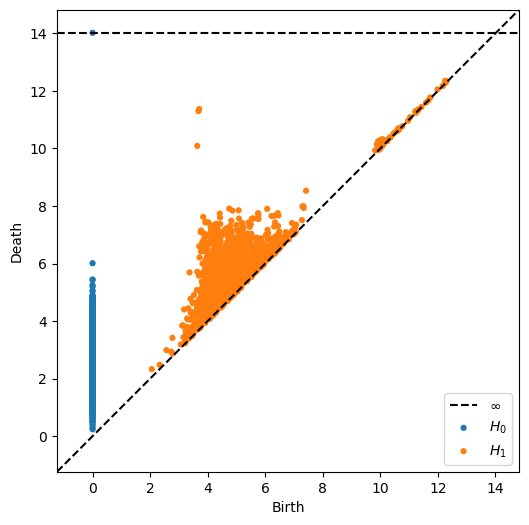

In [6]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

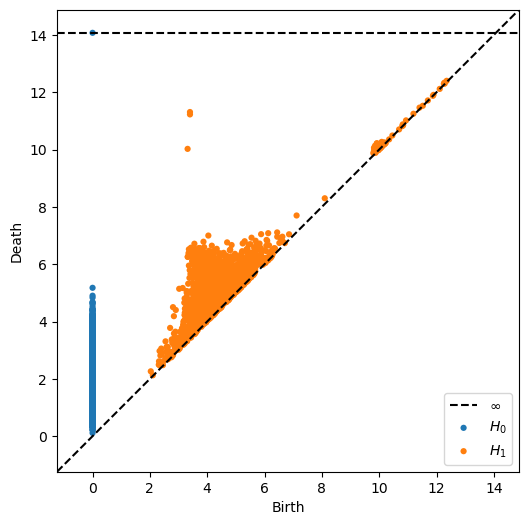

In [9]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

**There seems to be 3 classes in $H_1$ over $\mathbb{Z}_2$** 

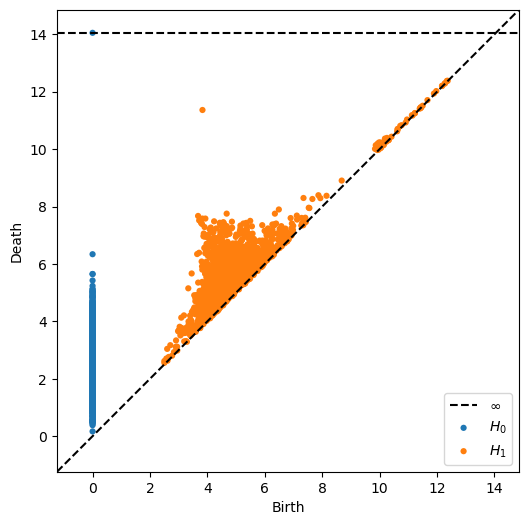

In [27]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

**There seems to be 1 class in $H_1$ over $\mathbb{Z}_3$** 

Looking into cocyles....

In [35]:
def p_hom_cocyles(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff, do_cocycles = True)
    return output
def pipeline_cocyles(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom_cocyles(M, maxdim, coeff)
    return output
output = pipeline_cocyles(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)


In [44]:
len(output['cocycles'][1])

1902

In [45]:
len(output['dgms'][1])

1902

every element in the persistent diagram has a corresponding element in the cocyles 

In [46]:
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

In [64]:
def persist_cocycles(output):
    H1 = list(output['dgms'][1])
    cocyles = list(output['cocycles'][1])
    
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0])
        
    dictionary = {}
    for i in range(len(H1)):
        dictionary[d[i]] = cocyles[i]
        
    myKeys = list(dictionary.keys())
    myKeys.sort(reverse=True)
    sorted_dict = {i: dictionary[i] for i in myKeys}
    
    return sorted_dict
    

In [66]:
cocycle = persist_cocycles(output)
# dictionary that contains length of barcode and array of elements that create the cycle in H1
# seems like somehow each "vertex" has been assigned an index
# so vector [i,j,1] in the array indicates that the 1-simplex spanned by vertices (i,j) appears in the cycle (once?)

In [69]:
cocycle[list(cocycle.keys())[0]]

array([[1428,  176,    1],
       [2088, 2014,    1],
       [2045,   29,    1],
       ...,
       [1877, 1786,    1],
       [2896, 2405,    1],
       [2949, 1115,    1]])